In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from openpyxl import load_workbook, Workbook
%matplotlib inline

In [2]:
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.io import output_notebook
from bokeh.models import HoverTool, Label, LabelSet, Span

In [3]:
TOOLS = " crosshair, pan, wheel_zoom, zoom_in, zoom_out, box_zoom, undo, redo, reset, tap, save, box_select, poly_select, lasso_select"
output_notebook()

Loading BokehJS ...

In [4]:
df = pd.read_excel(r"C:\EY\Thought Leadership\MA Correlation\correlation_test_data.xlsx" , sheetname='Sheet1')

In [5]:
file_path = r"C:\EY\Thought Leadership\MA Correlation\correlation_matrix.xlsx"
try:
    book = load_workbook(file_path)
except:
    wb = Workbook()
    wb.save(file_path)
    book = load_workbook(file_path)
writer = pd.ExcelWriter(file_path, engine='openpyxl')
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

In [6]:
# df.columns.tolist()

In [7]:
dataset = df[['Company',
 'Company Ticker',
 'market_cap',
 'Sector',
 'Est.Periods',
 'avg_TSR',
 'avg_ROA',
 'avg_ROE',
 'avg_EPS',
 'avg_dividend_ratio',
 'Rev_grow.Avg',
 'ebit_grow.avg',
 'avg_cost_growh',
 'Acquisitions',
 'ma_per_year',
 'Acq value',
 'Divestment',
 'div_per_year',
 'div_value',
 'Div as % deal value',
 'Deal intensity',
 'avg_deal_size',
 'avg_deal_size_mktcap',
 'domestic',
 'cross_border',
 'domestic_percentage',
 'in_sector',
 'out_sector',
 'sector_percentage'
 ]]

In [8]:
dataset.head()

,Company,Company Ticker,market_cap,Sector,Est.Periods,avg_TSR,avg_ROA,avg_ROE,avg_EPS,avg_dividend_ratio,...,Div as % deal value,Deal intensity,avg_deal_size,avg_deal_size_mktcap,domestic,cross_border,domestic_percentage,in_sector,out_sector,sector_percentage
0,AdAlta Limited,ASX:1AD,31.5722,Healthcare,1,NaN,-4.161288,-11.617421,-0.006322,0.000000,...,NaN,0.000000,0.00000,0.000000,0,0,0.0,0,0,0.000000
1,Alterra Limited,ASX:1AG,4.5952,Industrials,10,-0.134964,0.002032,-0.022584,-0.000132,0.000000,...,0.0,0.739903,0.00000,0.000000,0,0,0.0,0,0,0.000000
2,Oneall International Limited,ASX:1AL,118.035,Consumer Discretionary,2,-0.042105,0.000000,0.000000,0.000274,1.012631,...,0.0,0.033018,3.87600,0.032838,1,0,1.0,1,0,1.000000
3,1ST Group Limited,ASX:1ST,9.51668,Healthcare,3,-0.284786,-1.173495,-2.412567,-0.000825,0.000000,...,NaN,0.000000,0.00000,0.000000,3,0,1.0,1,2,0.333333
4,Pointerra Limited,ASX:3DP,31.7766,Information Technology,1,NaN,-0.402206,-1.647296,-0.000356,0.000000,...,0.0,3.456094,32.30083,1.016498,1,0,1.0,0,1,0.000000


In [11]:
dataset.dtypes

Company                  object
Company Ticker           object
market_cap               object
Sector                   object
Est.Periods               int64
avg_TSR                 float64
avg_ROA                 float64
avg_ROE                 float64
avg_EPS                 float64
avg_dividend_ratio      float64
Rev_grow.Avg            float64
ebit_grow.avg           float64
avg_cost_growh          float64
Acquisitions              int64
ma_per_year             float64
Acq value               float64
Divestment                int64
div_per_year            float64
div_value               float64
Div as % deal value     float64
Deal intensity          float64
avg_deal_size           float64
avg_deal_size_mktcap    float64
domestic                  int64
cross_border              int64
domestic_percentage     float64
in_sector                 int64
out_sector                int64
sector_percentage       float64
dtype: object

In [12]:
dataset.describe()

,Est.Periods,avg_TSR,avg_ROA,avg_ROE,avg_EPS,avg_dividend_ratio,Rev_grow.Avg,ebit_grow.avg,avg_cost_growh,Acquisitions,...,Div as % deal value,Deal intensity,avg_deal_size,avg_deal_size_mktcap,domestic,cross_border,domestic_percentage,in_sector,out_sector,sector_percentage
count,2057.000000,1665.000000,1852.000000,1852.000000,1852.000000,2057.000000,1997.000000,1815.000000,1330.000000,2057.000000,...,898.000000,1820.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000
mean,6.560039,0.038775,-0.275267,-0.903542,-0.013695,0.468439,104.437884,1.658020,11.163951,2.475936,...,0.091146,5.095734,29.239612,1.194824,3.580943,0.118133,0.701943,2.550316,1.148760,0.499694
std,3.918605,0.523030,0.934642,5.132382,0.325013,3.590962,3797.401550,521.794144,355.181947,4.383215,...,0.282199,60.875258,259.751476,14.969917,6.743089,0.812204,0.455511,5.353962,2.625866,0.430105
min,0.000000,-1.000000,-17.492797,-124.991260,-11.854210,0.000000,-0.281445,-13479.698482,-1200.885235,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,-0.136650,-0.264645,-0.630617,-0.000671,0.000000,0.000000,-0.104377,-0.031553,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.007835,-0.070016,-0.167674,-0.000173,0.000000,0.129168,0.197866,0.157721,1.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.500000
75%,10.000000,0.152806,0.029915,0.039866,0.000305,0.411189,0.617502,0.880718,0.695202,3.000000,...,0.000000,0.107364,0.503125,0.003131,4.000000,0.000000,1.000000,3.000000,1.000000,1.000000
max,10.000000,12.402340,1.582807,13.294414,2.660394,113.820936,169191.725690,17229.834393,12873.048071,74.000000,...,1.000000,1762.941114,6598.372850,589.691162,97.000000,22.000000,1.000000,91.000000,39.000000,1.000000


In [13]:
dataset = dataset.fillna(value=0)

# Step One: Filter out all outliers and keep all data within two standard deviations (avg_TSR, avg_ROE, Rev_grow.Avg, avg_cost_growth, avg_deal_size_mktcap)

In [14]:
dataset.shape

(2057, 29)

In [15]:
dataset = dataset[~(((dataset['div_value']==0) & (dataset['Divestment']!=0)) | ((dataset['div_value']!=0) & (dataset['Divestment']==0)))] 

In [16]:
dataset = dataset[~(((dataset['Acq value']==0) & (dataset['Acquisitions']!=0)) | ((dataset['Acq value']!=0) & (dataset['Acquisitions']==0)))]

In [17]:
dataset = dataset[~(((dataset['div_per_year']==0) & (dataset['Divestment']!=0)) | ((dataset['div_per_year']!=0) & (dataset['Divestment']==0)))] 

In [18]:
dataset = dataset[~(((dataset['ma_per_year']==0) & (dataset['Acquisitions']!=0)) | ((dataset['ma_per_year']!=0) & (dataset['Acquisitions']==0)))] 

In [19]:
dataset = dataset[np.abs(dataset['avg_TSR']-df['avg_TSR'].mean())<=(2*dataset['avg_TSR'].std())]

In [20]:
dataset = dataset[np.abs(dataset['avg_ROA']-df['avg_ROA'].mean())<=(2*dataset['avg_ROA'].std())]

In [21]:
dataset = dataset[np.abs(dataset['avg_ROE']-df['avg_ROE'].mean())<=(2*dataset['avg_ROE'].std())]

In [22]:
dataset = dataset[np.abs(dataset['avg_cost_growh']-df['avg_cost_growh'].mean())<=(2*dataset['avg_cost_growh'].std())]

In [23]:
dataset = dataset[np.abs(dataset['avg_deal_size_mktcap']-df['avg_deal_size_mktcap'].mean())<=(2*dataset['avg_deal_size_mktcap'].std())]

In [24]:
dataset = dataset[np.abs(dataset['Deal intensity']-df['Deal intensity'].mean())<=(2*dataset['Deal intensity'].std())]

In [25]:
dataset = dataset[np.abs(dataset['Rev_grow.Avg']-df['Rev_grow.Avg'].mean())<=(2*dataset['Rev_grow.Avg'].std())]

In [26]:
dataset = dataset[np.abs(dataset['ebit_grow.avg']-df['ebit_grow.avg'].mean())<=(2*dataset['ebit_grow.avg'].std())]

In [27]:
dataset.to_excel(writer, 'Clean Data', index=False)
writer.save()

In [28]:
dataset.shape

(745, 29)

In [29]:
dataset.describe()

,Est.Periods,avg_TSR,avg_ROA,avg_ROE,avg_EPS,avg_dividend_ratio,Rev_grow.Avg,ebit_grow.avg,avg_cost_growh,Acquisitions,...,Div as % deal value,Deal intensity,avg_deal_size,avg_deal_size_mktcap,domestic,cross_border,domestic_percentage,in_sector,out_sector,sector_percentage
count,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,...,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000
mean,6.377181,0.020226,-0.122677,-0.352614,-0.008893,0.554453,2.895742,0.821442,1.148927,2.119463,...,0.033550,0.703571,23.380177,0.366481,3.194631,0.161074,0.556580,2.378523,0.977181,0.405465
std,4.134989,0.200615,0.331318,1.002070,0.223546,3.935278,23.316382,9.316868,13.196887,5.079789,...,0.170294,2.340090,117.863250,1.878131,7.795158,1.141042,0.495594,6.659262,2.224199,0.426862
min,0.000000,-0.628437,-1.908867,-9.211474,-6.085715,0.000000,-0.281445,-108.835655,-3.770447,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,-0.069714,-0.172234,-0.387655,-0.000392,0.000000,0.000000,-0.082043,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,0.000000,-0.013871,-0.000036,0.000000,0.090354,0.012315,0.000000,1.000000,...,0.000000,0.000319,0.025000,0.000064,1.000000,0.000000,1.000000,1.000000,0.000000,0.250000
75%,10.000000,0.087361,0.025866,0.028004,0.000240,0.436345,0.510421,0.543604,0.215764,3.000000,...,0.000000,0.172089,3.000000,0.060560,4.000000,0.000000,1.000000,2.000000,1.000000,0.857143
max,10.000000,0.685662,1.246551,2.195864,0.237038,93.668813,439.829439,163.208870,348.705876,74.000000,...,1.000000,17.306135,1383.750150,36.682135,97.000000,22.000000,1.000000,91.000000,23.000000,1.000000


# Step Two:Slicing data based on organic vs in-organic, ROA, ROE, EPS, Dividend Payout Ratio, Frequency, Deal intensity. 

<h4>A: Slicing and statistical testing based on organic vs in-organic </h4>

In [30]:
organic = dataset[(dataset['Acquisitions']==0)]
in_organic = dataset[((dataset['Acquisitions']!=0))]
organic.shape, in_organic.shape

((361, 29), (384, 29))

In [31]:
organic.describe()

,Est.Periods,avg_TSR,avg_ROA,avg_ROE,avg_EPS,avg_dividend_ratio,Rev_grow.Avg,ebit_grow.avg,avg_cost_growh,Acquisitions,...,Div as % deal value,Deal intensity,avg_deal_size,avg_deal_size_mktcap,domestic,cross_border,domestic_percentage,in_sector,out_sector,sector_percentage
count,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.0,...,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,4.828255,-0.003574,-0.108302,-0.225128,-0.017190,0.599810,2.599553,0.616025,0.508038,0.0,...,0.011080,0.004159,0.038680,0.002392,0.487535,0.013850,0.152304,0.362881,0.138504,0.093128
std,4.448268,0.170058,0.315510,0.636505,0.320673,5.325460,24.613921,11.879723,3.321838,0.0,...,0.104824,0.059673,0.407868,0.026823,3.036900,0.138752,0.359745,2.993262,0.555465,0.280091
min,0.000000,-0.599397,-1.908867,-4.256516,-6.085715,0.000000,-0.211029,-108.835655,-3.770447,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-0.040506,-0.093244,-0.209510,-0.000208,0.000000,0.000000,-0.039006,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10.000000,0.031359,0.000000,0.000000,0.000000,0.000000,0.300790,0.230623,0.071676,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,0.667103,0.740434,1.481229,0.237038,93.668813,439.829439,163.208870,48.233366,0.0,...,1.000000,1.086480,5.500000,0.379066,54.000000,2.000000,1.000000,55.000000,5.000000,1.000000


In [32]:
organic.corr()

,Est.Periods,avg_TSR,avg_ROA,avg_ROE,avg_EPS,avg_dividend_ratio,Rev_grow.Avg,ebit_grow.avg,avg_cost_growh,Acquisitions,...,Div as % deal value,Deal intensity,avg_deal_size,avg_deal_size_mktcap,domestic,cross_border,domestic_percentage,in_sector,out_sector,sector_percentage
Est.Periods,1.000000,0.020415,-0.087762,-0.102821,-0.051390,0.046077,-0.039960,-0.106184,-0.061960,NaN,...,0.123238,0.081250,0.110565,0.103959,0.114580,0.089376,0.408693,0.078963,0.223255,0.354198
avg_TSR,0.020415,1.000000,0.066232,0.083960,-0.105421,0.068280,0.030299,-0.131013,-0.000942,NaN,...,0.029308,-0.048100,0.066068,-0.019390,0.066312,-0.067596,0.011877,0.061203,0.015852,-0.007660
avg_ROA,-0.087762,0.066232,1.000000,0.821091,0.015614,0.046477,-0.054089,0.006072,-0.088200,NaN,...,-0.012699,0.007381,-0.007944,-0.014655,0.023971,0.043918,-0.004188,0.022714,0.019629,0.007818
avg_ROE,-0.102821,0.083960,0.821091,1.000000,0.036058,0.048660,-0.011786,0.022299,-0.102906,NaN,...,-0.036847,-0.002938,-0.019121,-0.032017,0.025706,0.020126,0.000160,0.018672,0.044956,-0.008782
avg_EPS,-0.051390,-0.105421,0.015614,0.036058,1.000000,0.006204,-0.009547,0.485642,0.000864,NaN,...,0.001864,0.003167,0.002243,0.002493,0.008267,0.005926,0.022974,0.006232,0.013099,0.016999
avg_dividend_ratio,0.046077,0.068280,0.046477,0.048660,0.006204,1.000000,-0.009458,0.000477,-0.012424,NaN,...,-0.009513,-0.007733,-0.007282,-0.009797,0.864510,0.354193,0.162145,0.895334,-0.009711,0.223508
Rev_grow.Avg,-0.039960,0.030299,-0.054089,-0.011786,-0.009547,-0.009458,1.000000,-0.018021,-0.010868,NaN,...,0.034392,0.002176,0.028385,0.024934,-0.009253,-0.005629,-0.011867,-0.007915,-0.009341,-0.014326
ebit_grow.avg,-0.106184,-0.131013,0.006072,0.022299,0.485642,0.000477,-0.018021,1.000000,0.046333,NaN,...,-0.007708,-0.007471,-0.005803,-0.007478,-0.007889,0.006025,-0.036254,-0.004602,-0.016831,-0.032526
avg_cost_growh,-0.061960,-0.000942,-0.088200,-0.102906,0.000864,-0.012424,-0.010868,0.046333,1.000000,NaN,...,-0.017386,-0.010701,-0.014987,-0.014665,-0.008202,-0.008978,0.002172,-0.002119,-0.035671,0.030796
Acquisitions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
in_organic.describe()

,Est.Periods,avg_TSR,avg_ROA,avg_ROE,avg_EPS,avg_dividend_ratio,Rev_grow.Avg,ebit_grow.avg,avg_cost_growh,Acquisitions,...,Div as % deal value,Deal intensity,avg_deal_size,avg_deal_size_mktcap,domestic,cross_border,domestic_percentage,in_sector,out_sector,sector_percentage
count,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,...,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000
mean,7.833333,0.042602,-0.136191,-0.472465,-0.001093,0.511812,3.174191,1.014554,1.751429,4.111979,...,0.054674,1.361091,45.323615,0.708762,5.739583,0.299479,0.936641,4.273438,1.765625,0.699094
std,3.198128,0.223521,0.345385,1.241000,0.017123,1.849890,22.055748,5.990992,18.088359,6.473925,...,0.212327,3.120835,161.211271,2.570808,9.796354,1.572080,0.237906,8.384103,2.834378,0.319096
min,1.000000,-0.628437,-1.826277,-9.211474,-0.303703,0.000000,-0.281445,-23.245001,-1.000000,1.000000,...,0.000000,0.000000,0.000440,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,-0.080157,-0.204157,-0.534803,-0.000614,0.000000,0.041076,-0.108251,0.000000,1.000000,...,0.000000,0.019815,0.623048,0.004992,2.000000,0.000000,1.000000,1.000000,0.000000,0.500000
50%,10.000000,0.021702,-0.053554,-0.160395,-0.000149,0.000000,0.152931,0.165987,0.047907,3.000000,...,0.000000,0.144624,2.564853,0.050612,3.000000,0.000000,1.000000,2.000000,1.000000,0.750000
75%,10.000000,0.163060,0.044645,0.073304,0.000683,0.587996,0.630295,0.832249,0.362841,5.000000,...,0.000000,0.773524,15.102417,0.260613,6.000000,0.000000,1.000000,4.000000,2.000000,1.000000
max,10.000000,0.685662,1.246551,2.195864,0.031566,22.083333,371.426578,47.078681,348.705876,74.000000,...,0.999465,17.306135,1383.750150,36.682135,97.000000,22.000000,1.000000,91.000000,23.000000,1.000000


In [34]:
in_organic.corr()

,Est.Periods,avg_TSR,avg_ROA,avg_ROE,avg_EPS,avg_dividend_ratio,Rev_grow.Avg,ebit_grow.avg,avg_cost_growh,Acquisitions,...,Div as % deal value,Deal intensity,avg_deal_size,avg_deal_size_mktcap,domestic,cross_border,domestic_percentage,in_sector,out_sector,sector_percentage
Est.Periods,1.000000,-0.006777,0.140109,0.199130,0.103164,-0.031731,-0.022882,-0.122119,-0.126717,0.042267,...,0.051734,-0.048234,-0.025676,-0.020476,0.156286,-0.027956,0.183019,0.138711,0.114351,0.120039
avg_TSR,-0.006777,1.000000,-0.005687,0.009852,0.025808,0.140357,-0.044139,-0.017376,0.070028,0.139476,...,-0.051088,-0.110954,0.150048,0.042018,0.092927,-0.041809,0.042302,0.096487,0.012580,0.090750
avg_ROA,0.140109,-0.005687,1.000000,0.733701,0.288534,0.161497,-0.060852,-0.127857,-0.010671,0.136352,...,0.080572,-0.107863,0.041613,-0.055245,0.167434,0.055612,-0.067725,0.146030,0.177584,0.080300
avg_ROE,0.199130,0.009852,0.733701,1.000000,0.394780,0.129163,-0.052305,-0.065866,-0.030329,0.113457,...,0.094407,-0.153176,0.053082,-0.050444,0.137936,0.049292,-0.049157,0.127146,0.127985,0.081744
avg_EPS,0.103164,0.025808,0.288534,0.394780,1.000000,0.048948,-0.002071,-0.017686,-0.059610,0.036663,...,0.077655,-0.008436,0.058896,0.004072,0.057164,0.009726,-0.003299,0.057348,0.033331,0.093646
avg_dividend_ratio,-0.031731,0.140357,0.161497,0.129163,0.048948,1.000000,-0.036960,-0.046407,-0.023385,0.080270,...,0.010443,-0.077284,-0.014845,-0.060902,0.096649,-0.020704,0.041959,0.090250,0.055600,0.035950
Rev_grow.Avg,-0.022882,-0.044139,-0.060852,-0.052305,-0.002071,-0.036960,1.000000,0.006363,0.002152,-0.008458,...,0.160750,0.073779,-0.018543,0.009350,-0.026918,-0.021165,0.028589,-0.028420,-0.020711,-0.015971
ebit_grow.avg,-0.122119,-0.017376,-0.127857,-0.065866,-0.017686,-0.046407,0.006363,1.000000,0.036720,-0.065553,...,0.031995,0.001720,-0.011774,0.003923,-0.075996,-0.004365,-0.035784,-0.059535,-0.088977,0.014382
avg_cost_growh,-0.126717,0.070028,-0.010671,-0.030329,-0.059610,-0.023385,0.002152,0.036720,1.000000,-0.027498,...,-0.009718,-0.009213,0.006608,-0.006462,-0.037706,0.028904,-0.214939,-0.028324,-0.030509,0.040320
Acquisitions,0.042267,0.139476,0.136352,0.113457,0.036663,0.080270,-0.008458,-0.065553,-0.027498,1.000000,...,0.461726,-0.103529,-0.088411,-0.105472,0.887650,0.136768,0.023687,0.864288,0.587244,0.020881


In [35]:
# Output the descriptive statistics and correlation matrix
organic.describe().to_excel(writer, 'organic_describe')
organic_corr = organic.corr().dropna(how='any', thresh=5, axis=0)
organic_corr = organic_corr.dropna(how='any', thresh=5, axis=1)
organic_corr.to_excel(writer, 'organic_corr')
writer.save()

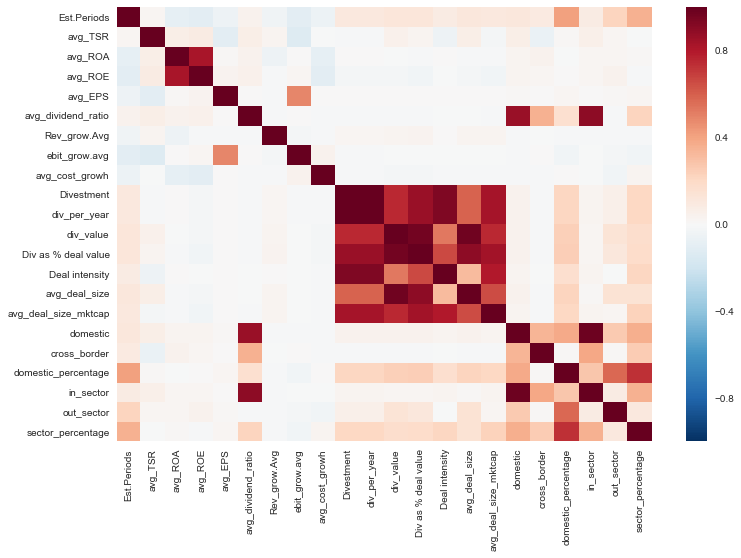

In [37]:
plt.figure(figsize=(12,8))
sns.heatmap(organic_corr)

In [35]:
# Output the scatter plot of TSR and de

In [39]:
# Output the descriptive statistics and correlation matrix
in_organic.describe().to_excel(writer, 'in_organic_describe')
in_organic_corr = in_organic.corr().dropna(how='any', thresh=5, axis=0)
in_organic_corr = in_organic_corr.dropna(how='any', thresh=5, axis=1)
in_organic_corr.to_excel(writer, 'in_organic_corr')
writer.save()

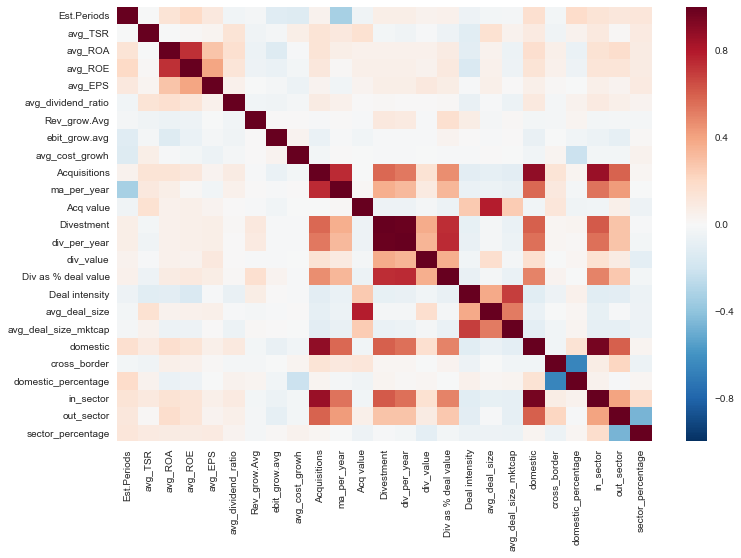

In [40]:
plt.figure(figsize=(12,8))
sns.heatmap(in_organic_corr)

In [114]:
# Output the scatter plot of TSR and deal intensity of inorganic growths.
in_organic.loc[:,'bubble_size'] = in_organic['ma_per_year']*10
source1 = ColumnDataSource(in_organic)
source2 = ColumnDataSource(organic)
in_organic_plot = figure(tools=TOOLS, width=900, height=500, x_axis_label="Deal Intensity", y_axis_label="TSR", x_range=(0,15))
in_organic_plot.scatter(y='avg_TSR', x='Deal intensity', size=10, alpha=0.6, source=source1)
#in_organic_plot.scatter(y='avg_TSR', x='Deal intensity', alpha=0.6, color='blue', source=source2)
hover = HoverTool(tooltips=[("Company", "@Company"), ("ma_per_year", "@ma_per_year"), ("Average TSR", "@avg_TSR")])
in_organic_plot.add_tools(hover)
in_organic_plot.ray(x=0, y=organic['avg_TSR'].mean(), angle=0, color='red', legend="Organic Avg. TSR", length=900, )
in_organic_plot.ray(x=0, y=in_organic['avg_TSR'].mean(), angle=0, color='green', legend="In Organic Avg. TSR", length=900)
organic_label = Label(x=800, y=-0.05, x_units='screen', text=str('{0:.2f}'.format(organic['avg_TSR'].mean()*100)) + "%", text_font_size='10pt')
in_organic_label = Label(x=800, y=0.05, x_units='screen', text=str('{0:.2f}'.format(in_organic['avg_TSR'].mean()*100)) + "%", text_font_size='10pt')
in_organic_plot.add_layout(organic_label)
in_organic_plot.add_layout(in_organic_label)
show(in_organic_plot)

C:\Users\duro\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


<h4>B: Slicing and statistical testing based on frequency (Non-acquirer, periodic acquirer (one in every five years), frequency acquirer) </h4>

In [42]:
dataset.shape

(745, 29)

In [43]:
non_acquirer = dataset[(dataset['Acquisitions']==0)]
periodic_acquirer = dataset[(dataset['ma_per_year']<=0.2) & (dataset['ma_per_year']>0)]
frequent_acquirer = dataset[(dataset['ma_per_year'])>0.2]
non_acquirer.shape, periodic_acquirer.shape, frequent_acquirer.shape

((361, 29), (126, 29), (258, 29))

In [44]:
periodic_acquirer.describe()

,Est.Periods,avg_TSR,avg_ROA,avg_ROE,avg_EPS,avg_dividend_ratio,Rev_grow.Avg,ebit_grow.avg,avg_cost_growh,Acquisitions,...,Div as % deal value,Deal intensity,avg_deal_size,avg_deal_size_mktcap,domestic,cross_border,domestic_percentage,in_sector,out_sector,sector_percentage
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,...,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,9.539683,0.018594,-0.157253,-0.516187,-0.000811,0.351173,1.621326,1.204595,0.587190,1.404762,...,0.022995,1.838030,79.001045,1.388800,2.650794,0.079365,0.974206,1.857143,0.873016,0.751542
std,1.269020,0.215778,0.241628,1.151857,0.008105,1.129305,5.207797,6.472463,2.547809,0.568205,...,0.146170,3.874903,227.530015,4.104738,2.221054,0.483374,0.154368,1.412596,1.549111,0.318180
min,5.000000,-0.472358,-1.225581,-8.710519,-0.066910,0.000000,-0.247375,-12.633381,-1.000000,1.000000,...,0.000000,0.000025,0.009000,0.000012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,-0.122038,-0.227325,-0.547770,-0.000654,0.000000,0.021392,-0.163930,-0.050425,1.000000,...,0.000000,0.060102,1.299444,0.033584,1.000000,0.000000,1.000000,1.000000,0.000000,0.500000
50%,10.000000,0.003240,-0.101728,-0.243625,-0.000191,0.000000,0.190664,0.167457,0.000000,1.000000,...,0.000000,0.217658,4.870392,0.139430,2.000000,0.000000,1.000000,2.000000,0.000000,1.000000
75%,10.000000,0.112987,0.004670,-0.017329,-0.000030,0.358229,1.061184,1.025610,0.178276,2.000000,...,0.000000,1.268654,23.895894,0.779406,3.000000,0.000000,1.000000,2.000000,1.000000,1.000000
max,10.000000,0.684817,0.161333,0.463262,0.030923,9.349301,48.268682,45.668969,16.832821,3.000000,...,0.999428,17.306135,1383.750150,36.682135,16.000000,4.000000,1.000000,11.000000,12.000000,1.000000


In [45]:
periodic_acquirer.corr()

,Est.Periods,avg_TSR,avg_ROA,avg_ROE,avg_EPS,avg_dividend_ratio,Rev_grow.Avg,ebit_grow.avg,avg_cost_growh,Acquisitions,...,Div as % deal value,Deal intensity,avg_deal_size,avg_deal_size_mktcap,domestic,cross_border,domestic_percentage,in_sector,out_sector,sector_percentage
Est.Periods,1.000000,-0.080373,0.299920,0.204253,0.008410,0.104900,-0.206021,-0.133026,0.012262,0.182799,...,-0.063299,-0.134222,-0.076913,-0.114556,0.243375,0.060034,-0.061095,0.212937,0.173502,-0.166638
avg_TSR,-0.080373,1.000000,-0.194477,-0.208947,0.048375,-0.092144,0.069440,-0.070678,-0.055136,0.065359,...,-0.173600,-0.032894,0.212963,0.171399,-0.044449,0.053922,-0.103721,-0.023810,-0.025191,0.063858
avg_ROA,0.299920,-0.194477,1.000000,0.549707,0.179714,0.228598,0.033550,-0.146587,-0.046098,-0.010072,...,0.089445,-0.031036,0.062670,-0.034944,0.257680,0.090381,-0.084529,0.301400,0.122814,0.049580
avg_ROE,0.204253,-0.208947,0.549707,1.000000,0.101847,0.122285,0.048933,-0.052351,0.003536,0.070319,...,0.089734,-0.003440,0.086395,0.012249,0.165669,0.054962,-0.056193,0.185120,0.085873,-0.007454
avg_EPS,0.008410,0.048375,0.179714,0.101847,1.000000,0.114047,-0.010843,-0.111194,-0.326124,-0.072402,...,0.148240,-0.035301,0.197435,0.003344,0.108741,-0.020760,0.017731,0.044005,0.109303,-0.010803
avg_dividend_ratio,0.104900,-0.092144,0.228598,0.122285,0.114047,1.000000,-0.091503,-0.067115,-0.063635,-0.094884,...,-0.026534,-0.124457,-0.023034,-0.087412,0.132208,-0.034264,0.035621,0.195014,0.001034,0.096922
Rev_grow.Avg,-0.206021,0.069440,0.033550,0.048933,-0.010843,-0.091503,1.000000,-0.010489,0.009197,-0.071844,...,0.000979,-0.018000,-0.014361,-0.020490,-0.152151,0.029598,-0.011491,-0.114340,-0.104648,0.104431
ebit_grow.avg,-0.133026,-0.070678,-0.146587,-0.052351,-0.111194,-0.067115,-0.010489,1.000000,-0.000849,-0.035545,...,0.220016,-0.036775,-0.033541,-0.013421,-0.091427,-0.021555,0.018155,-0.079458,-0.065355,0.066965
avg_cost_growh,0.012262,-0.055136,-0.046098,0.003536,-0.326124,-0.063635,0.009197,-0.000849,1.000000,-0.022030,...,-0.056435,0.081521,0.255647,0.059606,-0.042698,0.236983,-0.177404,0.003699,0.009354,-0.030646
Acquisitions,0.182799,0.065359,-0.010072,0.070319,-0.072402,-0.094884,-0.071844,-0.035545,-0.022030,1.000000,...,0.162853,-0.081895,-0.101467,-0.128735,0.303068,-0.059642,0.028774,0.242057,0.195191,-0.222823


In [46]:
frequent_acquirer.describe()

,Est.Periods,avg_TSR,avg_ROA,avg_ROE,avg_EPS,avg_dividend_ratio,Rev_grow.Avg,ebit_grow.avg,avg_cost_growh,Acquisitions,...,Div as % deal value,Deal intensity,avg_deal_size,avg_deal_size_mktcap,domestic,cross_border,domestic_percentage,in_sector,out_sector,sector_percentage
count,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,...,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000
mean,7.000000,0.054326,-0.125905,-0.451112,-0.001231,0.590263,3.932567,0.921744,2.320011,5.434109,...,0.070145,1.128167,28.876498,0.376651,7.248062,0.406977,0.918296,5.453488,2.201550,0.673480
std,3.512069,0.226693,0.386077,1.283911,0.020123,2.112043,26.645846,5.752097,21.987587,7.546839,...,0.236772,2.654380,112.797476,1.147544,11.561058,1.879924,0.267822,9.976225,3.197469,0.317009
min,1.000000,-0.628437,-1.826277,-9.211474,-0.303703,0.000000,-0.281445,-23.245001,-1.000000,1.000000,...,0.000000,0.000000,0.000440,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,-0.059566,-0.193580,-0.527257,-0.000558,0.000000,0.048760,-0.098295,0.000000,2.250000,...,0.000000,0.011124,0.443947,0.001974,2.000000,0.000000,1.000000,2.000000,0.000000,0.500000
50%,9.000000,0.025789,-0.026697,-0.119232,-0.000142,0.000000,0.145522,0.163139,0.110105,4.000000,...,0.000000,0.108735,1.689659,0.020721,4.000000,0.000000,1.000000,3.000000,1.000000,0.750000
75%,10.000000,0.178105,0.062095,0.095319,0.001368,0.631695,0.447135,0.731374,0.484390,6.000000,...,0.000000,0.615133,9.676126,0.142770,8.000000,0.000000,1.000000,6.000000,2.750000,1.000000
max,10.000000,0.685662,1.246551,2.195864,0.031566,22.083333,371.426578,47.078681,348.705876,74.000000,...,0.999465,16.676893,1356.417445,8.406774,97.000000,22.000000,1.000000,91.000000,23.000000,1.000000


In [47]:
frequent_acquirer.corr()

,Est.Periods,avg_TSR,avg_ROA,avg_ROE,avg_EPS,avg_dividend_ratio,Rev_grow.Avg,ebit_grow.avg,avg_cost_growh,Acquisitions,...,Div as % deal value,Deal intensity,avg_deal_size,avg_deal_size_mktcap,domestic,cross_border,domestic_percentage,in_sector,out_sector,sector_percentage
Est.Periods,1.000000,0.041923,0.156449,0.241068,0.113562,-0.020608,0.002035,-0.158012,-0.122944,0.173963,...,0.117260,-0.106226,-0.128383,-0.200333,0.266219,0.007072,0.177086,0.238768,0.221757,0.134711
avg_TSR,0.041923,1.000000,0.044657,0.098146,0.024332,0.197575,-0.064472,0.012778,0.083518,0.145811,...,-0.028042,-0.155571,0.139310,-0.099723,0.099012,-0.066842,0.093733,0.101997,0.000463,0.117340
avg_ROA,0.156449,0.044657,1.000000,0.794000,0.305850,0.148348,-0.071468,-0.126014,-0.012186,0.141891,...,0.074193,-0.148128,0.052694,-0.103362,0.163445,0.050266,-0.059791,0.140984,0.180645,0.099199
avg_ROE,0.241068,0.098146,0.794000,1.000000,0.466338,0.132540,-0.067985,-0.072294,-0.037435,0.128972,...,0.094452,-0.252763,0.040655,-0.167175,0.147836,0.050301,-0.045282,0.136463,0.138332,0.125900
avg_EPS,0.113562,0.024332,0.305850,0.466338,1.000000,0.043198,-0.001162,0.000815,-0.054242,0.044621,...,0.071747,-0.004320,0.025664,0.003162,0.060065,0.012557,-0.007153,0.062375,0.029950,0.119965
avg_dividend_ratio,-0.020608,0.197575,0.148348,0.132540,0.043198,1.000000,-0.038516,-0.041616,-0.026132,0.071829,...,0.009058,-0.061384,0.000961,-0.063885,0.085465,-0.026807,0.051096,0.078379,0.048709,0.031117
Rev_grow.Avg,0.002035,-0.064472,-0.071468,-0.067985,-0.001162,-0.038516,1.000000,0.010702,-0.000169,-0.023690,...,0.172073,0.117142,-0.017241,0.058007,-0.036720,-0.027536,0.037921,-0.038223,-0.029699,-0.022758
ebit_grow.avg,-0.158012,0.012778,-0.126014,-0.072294,0.000815,-0.041616,0.010702,1.000000,0.048218,-0.077170,...,-0.026576,0.028189,0.003712,0.025627,-0.083898,0.000190,-0.058448,-0.065664,-0.098365,-0.018304
avg_cost_growh,-0.122944,0.083518,-0.012186,-0.037435,-0.054242,-0.026132,-0.000169,0.048218,1.000000,-0.042686,...,-0.013890,-0.013045,-0.005949,-0.006867,-0.049032,0.021675,-0.222897,-0.038571,-0.044198,0.057883
Acquisitions,0.173963,0.145811,0.141891,0.128972,0.044621,0.071829,-0.023690,-0.077170,-0.042686,1.000000,...,0.490625,-0.104199,-0.075888,-0.130084,0.889494,0.116127,0.063006,0.863920,0.588948,0.078367


In [48]:
periodic_acquirer.describe().to_excel(writer, 'period_describe')
periodic_acquirer_corr = periodic_acquirer.corr().dropna(how='any', thresh=5, axis=0)
periodic_acquirer_corr = periodic_acquirer_corr.dropna(how='any', thresh=5, axis=0)
periodic_acquirer_corr.to_excel(writer, 'periodic_corr')
writer.save()

In [49]:
frequent_acquirer.describe().to_excel(writer, 'frequent_describe')
frequent_corr = frequent_acquirer.corr().dropna(how='any', thresh=5, axis=0)
frequent_corr = frequent_corr.dropna(how='any', thresh=5, axis=0)
frequent_corr.to_excel(writer, 'frequent_corr')
writer.save()

In [112]:
source = ColumnDataSource(dataset)
source1 = ColumnDataSource(organic)
source2 = ColumnDataSource(periodic_acquirer)
source3 = ColumnDataSource(frequent_acquirer)
dataset_plot = figure(tools=TOOLS, width=900, height=500, x_axis_label="Deal Frequency", y_axis_label="TSR", x_range=(0,10))
dataset_plot.scatter(y='avg_TSR', x='ma_per_year', size=10, alpha=0.6, color='green', source=source1)
dataset_plot.scatter(y='avg_TSR', x='ma_per_year', size=10, alpha=0.6, color='blue', source=source2)
dataset_plot.scatter(y='avg_TSR', x='ma_per_year', size=10, alpha=0.6, color='gray', source=source3)
hover = HoverTool(tooltips=[("Company", "@Company"), ("ma_per_year", "@ma_per_year"), ("Average TSR", "@avg_TSR")])
dataset_plot.ray(x=0, y=organic['avg_TSR'].mean(), angle=0, color='red', legend="Organic Avg. TSR", length=900)
dataset_plot.ray(x=0, y=periodic_acquirer['avg_TSR'].mean(), angle=0, color='green', legend="Periodic Acquirer's Avg. TSR", length=900)
dataset_plot.ray(x=0, y=frequent_acquirer['avg_TSR'].mean(), angle=0, color='gray', legend="Frequent Acquirer's Avg. TSR", length=900)
organic_label = Label(x=800, y=-0.05, x_units='screen', text=str('{0:.2f}'.format(organic['avg_TSR'].mean()*100)) + "%", text_font_size='10pt')
periodic_label = Label(x=800, y=0.01, x_units='screen', text=str('{0:.2f}'.format(periodic_acquirer['avg_TSR'].mean()*100)) + "%", text_font_size='10pt')
frequent_label = Label(x=800, y=0.05, x_units='screen', text=str('{0:.2f}'.format(frequent_acquirer['avg_TSR'].mean()*100)) + "%", text_font_size='10pt')
dataset_plot.add_tools(hover)
dataset_plot.add_layout(organic_label)
dataset_plot.add_layout(periodic_label)
dataset_plot.add_layout(frequent_label)
show(dataset_plot)

<h4>C: Slicing and statistical testing based on dividend payout ratio (dividend ratio less than 10% vs dividend ratio greater than 10%)</h1>

In [51]:
dividend_stock = dataset[dataset['avg_dividend_ratio']>0.1]
growth_stock = dataset[~(dataset['avg_dividend_ratio']>0.1)]
dividend_stock.shape, growth_stock.shape

((235, 29), (510, 29))

In [52]:
dividend_stock.describe()

,Est.Periods,avg_TSR,avg_ROA,avg_ROE,avg_EPS,avg_dividend_ratio,Rev_grow.Avg,ebit_grow.avg,avg_cost_growh,Acquisitions,...,Div as % deal value,Deal intensity,avg_deal_size,avg_deal_size_mktcap,domestic,cross_border,domestic_percentage,in_sector,out_sector,sector_percentage
count,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,...,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000
mean,7.991489,0.073550,0.076220,0.107690,0.002513,1.757179,0.324854,0.267547,0.305780,4.029787,...,0.067637,0.348704,30.361398,0.131376,6.757447,0.280851,0.715328,5.085106,1.953191,0.514396
std,3.269898,0.198150,0.135293,0.582116,0.018961,6.864160,1.677027,3.234785,1.437451,8.298592,...,0.242036,1.575753,119.767321,0.548473,12.687091,1.711529,0.448516,11.108305,3.132737,0.397487
min,0.000000,-0.477242,-0.826910,-7.562161,-0.149728,0.110497,-0.130211,-7.730184,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,-0.034034,0.023007,0.017751,0.000152,0.485847,0.028896,-0.252005,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.000000,0.057371,0.050245,0.088745,0.000898,0.703119,0.090991,0.000000,0.061999,2.000000,...,0.000000,0.002395,0.532885,0.000434,3.000000,0.000000,1.000000,2.000000,1.000000,0.600000
75%,10.000000,0.165757,0.087705,0.194367,0.002771,1.099311,0.187410,0.239905,0.217021,5.000000,...,0.000000,0.103353,5.138900,0.023676,8.000000,0.000000,1.000000,5.000000,2.000000,0.888889
max,10.000000,0.667103,0.905908,2.195864,0.237038,93.668813,23.712053,31.877874,15.876728,74.000000,...,1.000000,16.380701,987.387480,5.289601,97.000000,22.000000,1.000000,91.000000,23.000000,1.000000


In [53]:
dividend_stock.corr()

,Est.Periods,avg_TSR,avg_ROA,avg_ROE,avg_EPS,avg_dividend_ratio,Rev_grow.Avg,ebit_grow.avg,avg_cost_growh,Acquisitions,...,Div as % deal value,Deal intensity,avg_deal_size,avg_deal_size_mktcap,domestic,cross_border,domestic_percentage,in_sector,out_sector,sector_percentage
Est.Periods,1.000000,-0.123039,-0.354433,-0.233337,-0.063489,-0.075235,-0.091974,-0.121284,-0.143562,0.032294,...,0.070673,-0.090507,-0.098542,-0.081632,0.123461,0.020282,0.134834,0.108614,0.125950,0.143243
avg_TSR,-0.123039,1.000000,-0.031484,0.040607,0.001607,0.068168,-0.088346,-0.022002,0.007793,0.160660,...,0.009025,0.073761,0.085014,0.045085,0.106706,-0.055794,0.064967,0.106702,0.023306,0.074168
avg_ROA,-0.354433,-0.031484,1.000000,0.447420,0.400607,-0.064708,0.103669,0.050109,-0.026087,-0.007244,...,-0.010475,-0.046193,0.044597,-0.044012,-0.059435,-0.034209,-0.015354,-0.053655,-0.069138,-0.024581
avg_ROE,-0.233337,0.040607,0.447420,1.000000,0.128685,-0.014046,0.070418,0.043652,-0.001538,0.011461,...,0.015154,-0.123669,0.029351,-0.181984,-0.014082,-0.023940,-0.070342,-0.014266,-0.019525,-0.087715
avg_EPS,-0.063489,0.001607,0.400607,0.128685,1.000000,-0.018634,-0.013156,0.003794,-0.015413,0.002259,...,0.054751,-0.029411,0.053251,-0.034425,0.006960,-0.011899,0.020827,-0.001431,0.026761,-0.039055
avg_dividend_ratio,-0.075235,0.068168,-0.064708,-0.014046,-0.018634,1.000000,0.010660,0.006990,-0.022021,-0.036600,...,-0.038908,-0.018748,-0.027958,-0.029401,0.203514,0.006184,0.056256,0.251790,-0.065239,0.114724
Rev_grow.Avg,-0.091974,-0.088346,0.103669,0.070418,-0.013156,0.010660,1.000000,0.301334,0.097519,-0.010391,...,-0.023846,-0.011026,-0.027620,0.000486,-0.027016,-0.021292,0.001874,-0.036576,0.008651,-0.111214
ebit_grow.avg,-0.121284,-0.022002,0.050109,0.043652,0.003794,0.006990,0.301334,1.000000,-0.143682,-0.051541,...,-0.016351,-0.021883,-0.027187,-0.012609,-0.043618,-0.097976,-0.113486,-0.047808,-0.060654,-0.163136
avg_cost_growh,-0.143562,0.007793,-0.026087,-0.001538,-0.015413,-0.022021,0.097519,-0.143682,1.000000,0.066027,...,0.062218,-0.002809,-0.018839,-0.026142,0.028046,-0.018635,-0.012791,0.013953,0.053927,-0.045087
Acquisitions,0.032294,0.160660,-0.007244,0.011461,0.002259,-0.036600,-0.010391,-0.051541,0.066027,1.000000,...,0.521100,-0.003984,-0.042537,-0.043710,0.867393,0.154663,0.261624,0.826132,0.667940,0.243974


In [54]:
growth_stock.describe()

,Est.Periods,avg_TSR,avg_ROA,avg_ROE,avg_EPS,avg_dividend_ratio,Rev_grow.Avg,ebit_grow.avg,avg_cost_growh,Acquisitions,...,Div as % deal value,Deal intensity,avg_deal_size,avg_deal_size_mktcap,domestic,cross_border,domestic_percentage,in_sector,out_sector,sector_percentage
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,5.633333,-0.004344,-0.214326,-0.564715,-0.014149,0.000255,4.080367,1.076668,1.537436,1.239216,...,0.017843,0.867087,20.163340,0.474813,1.552941,0.105882,0.483431,1.131373,0.527451,0.355271
std,4.280084,0.197128,0.354057,1.081235,0.269799,0.003623,28.087406,11.039164,15.910226,1.896546,...,0.121136,2.603425,116.953659,2.231671,2.501893,0.739408,0.499533,1.775293,1.441127,0.430928
min,0.000000,-0.628437,-1.908867,-9.211474,-6.085715,0.000000,-0.281445,-108.835655,-3.770447,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,-0.085996,-0.271975,-0.643567,-0.000633,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,0.000000,-0.089126,-0.221435,-0.000170,0.000000,0.087651,0.050558,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10.000000,0.047117,0.000000,0.000000,0.000000,0.000000,0.746424,0.814138,0.215758,2.000000,...,0.000000,0.214129,1.787848,0.082395,2.000000,0.000000,1.000000,2.000000,1.000000,0.800000
max,10.000000,0.685662,1.246551,1.706726,0.031566,0.068118,439.829439,163.208870,348.705876,11.000000,...,1.000000,17.306135,1383.750150,36.682135,26.000000,12.000000,1.000000,11.000000,23.000000,1.000000


In [55]:
growth_stock.corr()

,Est.Periods,avg_TSR,avg_ROA,avg_ROE,avg_EPS,avg_dividend_ratio,Rev_grow.Avg,ebit_grow.avg,avg_cost_growh,Acquisitions,...,Div as % deal value,Deal intensity,avg_deal_size,avg_deal_size_mktcap,domestic,cross_border,domestic_percentage,in_sector,out_sector,sector_percentage
Est.Periods,1.000000,0.043377,-0.096188,-0.038873,-0.035091,0.060635,-0.005380,-0.086745,-0.052414,0.331756,...,0.100567,0.156550,0.100025,0.102741,0.402970,0.020362,0.544998,0.405050,0.211058,0.469415
avg_TSR,0.043377,1.000000,-0.072393,-0.067552,-0.077710,0.057674,0.007517,-0.078845,0.083842,0.083257,...,-0.089779,-0.065284,0.158644,0.082358,0.029474,-0.020375,0.071929,0.053707,-0.025445,0.096980
avg_ROA,-0.096188,-0.072393,1.000000,0.725759,0.002456,0.047471,-0.031947,-0.031424,-0.002270,-0.096842,...,-0.016560,-0.053257,0.000298,-0.014125,-0.047466,0.033398,-0.188771,-0.051716,-0.001562,-0.085433
avg_ROE,-0.038873,-0.067552,0.725759,1.000000,0.020115,0.040222,-0.016243,-0.012659,-0.030010,-0.148449,...,0.011255,-0.144532,0.006206,-0.035497,-0.087300,0.026985,-0.227086,-0.068154,-0.053756,-0.120246
avg_EPS,-0.035091,-0.077710,0.002456,0.020115,1.000000,0.004107,-0.004029,0.441055,0.000176,0.024225,...,0.004147,0.015408,0.008865,0.010430,0.023165,0.006619,0.038414,0.026627,0.010810,0.037225
avg_dividend_ratio,0.060635,0.057674,0.047471,0.040222,0.004107,1.000000,-0.010034,-0.013123,-0.007582,-0.005057,...,-0.010399,-0.004394,0.246381,-0.007020,-0.008298,0.019803,-0.012006,0.004751,-0.010099,0.005766
Rev_grow.Avg,-0.005380,0.007517,-0.031947,-0.016243,-0.004029,-0.010034,1.000000,-0.015231,-0.002890,0.062585,...,0.206301,0.047955,-0.007684,0.002411,0.038130,-0.013002,0.034063,0.029296,0.023436,0.016179
ebit_grow.avg,-0.086745,-0.078845,-0.031424,-0.012659,0.441055,-0.013123,-0.015231,1.000000,0.025397,0.001703,...,0.036497,0.004762,0.004238,0.002807,-0.023113,0.038202,0.018371,0.000239,-0.020819,0.035641
avg_cost_growh,-0.052414,0.083842,-0.002270,-0.030010,0.000176,-0.007582,-0.002890,0.025397,1.000000,0.005643,...,-0.001618,0.000605,0.021781,-0.000850,-0.022811,0.070940,-0.030648,-0.001165,-0.001769,0.079432
Acquisitions,0.331756,0.083257,-0.096842,-0.148449,0.024225,-0.005057,0.062585,0.001703,0.005643,1.000000,...,0.078381,0.191790,0.040951,0.031973,0.775735,0.222873,0.585047,0.795892,0.480636,0.529841


In [56]:
dividend_stock.describe().to_excel(writer, 'dividend_describe')
dividend_corr = dividend_stock.corr().dropna(how='any', thresh=5, axis=0)
dividend_corr = dividend_corr.dropna(how='any', thresh=5, axis=0)
dividend_corr.to_excel(writer, 'dividend_corr')
writer.save()

In [57]:
growth_stock.describe().to_excel(writer, 'growth_describe')
growth_corr = growth_stock.corr().dropna(how='any', thresh=5, axis=0)
growth_corr = growth_corr.dropna(how='any', thresh=5, axis=0)
growth_corr.to_excel(writer, 'growth_corr')
writer.save()

In [58]:
dividend_stock[dividend_stock['Company'].str.contains("Steadfast")]

,Company,Company Ticker,market_cap,Sector,Est.Periods,avg_TSR,avg_ROA,avg_ROE,avg_EPS,avg_dividend_ratio,...,Div as % deal value,Deal intensity,avg_deal_size,avg_deal_size_mktcap,domestic,cross_border,domestic_percentage,in_sector,out_sector,sector_percentage
1637,Steadfast Group Limited,ASX:SDF,2106.19,Financials,4,0.445885,0.127003,0.189361,0.000272,0.436053,...,0.504708,0.21196,5.531687,0.002626,74,0,1.0,51,23,0.689189


In [59]:
source_1 = ColumnDataSource(dividend_stock)
source_2 = ColumnDataSource(growth_stock)
dataset_plot = figure(tools=TOOLS, width=900, height=500, x_axis_label="Deal Frequency", y_axis_label="TSR", x_range=(0,15))
dataset_plot.scatter(y='avg_TSR', x='ma_per_year', size=10, alpha=0.5, color='red', source=source_1, legend='Dividend Stocks')
dataset_plot.scatter(y='avg_TSR', x='ma_per_year', size=10, alpha=0.5, color='blue', source=source_2, legend='Growth Stocks')
dataset_plot.ray(x=0, y=dividend_stock['avg_TSR'].mean(), angle=0, color='green', legend="Dividend Stock Avg. TSR", length=900)
dataset_plot.ray(x=0, y=growth_stock['avg_TSR'].mean(), angle=0, color='red', legend="Growth Stock Avg. TSR", length=900)
hover = HoverTool(tooltips=[("Company", "@Company"), ("ma_per_year", "@ma_per_year"), ("Average TSR", "@avg_TSR")])
dataset_plot.add_tools(hover)
dividend_label = Label(x=800, y=0.07, x_units='screen', text=str('{0:.2f}'.format(dividend_stock['avg_TSR'].mean()*100)) + "%", text_font_size='10pt')
growth_label = Label(x=800, y=-0.01, x_units='screen', text=str('{0:.2f}'.format(growth_stock['avg_TSR'].mean()*100)) + "%", text_font_size='10pt')
dataset_plot.add_layout(dividend_label)
dataset_plot.add_layout(growth_label)
show(dataset_plot)

<h4>D: Slicing and statistical testing based on transaction in domestic or cross-border (domestic_percentage 80% as threshold)</h1>

In [60]:
domestic_acquirer = dataset[(dataset['domestic_percentage']>0.8)]
cross_border_acquirer = dataset[(dataset['domestic_percentage']<0.8) & (dataset['Acquisitions']!=0)]

In [61]:
domestic_acquirer.shape, cross_border_acquirer.shape

((413, 29), (25, 29))

In [62]:
domestic_acquirer.describe()

,Est.Periods,avg_TSR,avg_ROA,avg_ROE,avg_EPS,avg_dividend_ratio,Rev_grow.Avg,ebit_grow.avg,avg_cost_growh,Acquisitions,...,Div as % deal value,Deal intensity,avg_deal_size,avg_deal_size_mktcap,domestic,cross_border,domestic_percentage,in_sector,out_sector,sector_percentage
count,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,...,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000
mean,8.123487,0.038194,-0.138324,-0.454073,-0.000945,0.817892,3.155492,0.783704,0.734977,3.619855,...,0.057573,1.218980,37.533966,0.635783,5.738499,0.031477,0.998431,4.113801,1.656174,0.682772
std,3.041262,0.212026,0.338455,1.200041,0.021705,5.238533,21.352187,5.437451,3.372684,6.354671,...,0.221694,3.008673,141.444575,2.456537,9.751495,0.254049,0.011380,8.517209,2.684537,0.343350
min,1.000000,-0.628034,-1.826277,-9.211474,-0.303703,0.000000,-0.281445,-23.245001,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.888889,0.000000,0.000000,0.000000
25%,7.000000,-0.081578,-0.206835,-0.489687,-0.000571,0.000000,0.031809,-0.184203,0.000000,1.000000,...,0.000000,0.004822,0.244444,0.000672,2.000000,0.000000,1.000000,1.000000,0.000000,0.500000
50%,10.000000,0.016357,-0.048552,-0.144343,-0.000144,0.000000,0.154061,0.096157,0.039862,2.000000,...,0.000000,0.101510,1.650000,0.030847,3.000000,0.000000,1.000000,2.000000,1.000000,0.750000
75%,10.000000,0.149391,0.044271,0.068178,0.000518,0.591093,0.654958,0.566749,0.324302,4.000000,...,0.000000,0.596073,9.191673,0.191460,6.000000,0.000000,1.000000,4.000000,2.000000,1.000000
max,10.000000,0.685662,0.905908,2.195864,0.237038,93.668813,371.426578,47.078681,38.173333,74.000000,...,1.000000,17.306135,1383.750150,36.682135,97.000000,4.000000,1.000000,91.000000,23.000000,1.000000


In [63]:
domestic_acquirer.corr()

,Est.Periods,avg_TSR,avg_ROA,avg_ROE,avg_EPS,avg_dividend_ratio,Rev_grow.Avg,ebit_grow.avg,avg_cost_growh,Acquisitions,...,Div as % deal value,Deal intensity,avg_deal_size,avg_deal_size_mktcap,domestic,cross_border,domestic_percentage,in_sector,out_sector,sector_percentage
Est.Periods,1.000000,-0.047974,0.162238,0.213570,0.036854,-0.057614,-0.034441,-0.167764,-0.152685,0.000300,...,0.071208,-0.064026,-0.048181,-0.029801,0.098238,-0.014467,0.029626,0.091004,0.066752,0.137854
avg_TSR,-0.047974,1.000000,0.000700,0.012820,0.021571,0.076772,-0.047868,-0.033705,-0.013638,0.151567,...,-0.017963,-0.082223,0.143097,0.056149,0.106475,0.048004,-0.022408,0.109620,0.043518,0.071653
avg_ROA,0.162238,0.000700,1.000000,0.737039,0.315787,0.079933,-0.070909,-0.125506,-0.152712,0.129054,...,0.089447,-0.103031,0.035305,-0.055886,0.172151,0.089262,-0.101602,0.144400,0.175644,0.062348
avg_ROE,0.213570,0.012820,0.737039,1.000000,0.340244,0.066701,-0.061145,-0.074832,-0.083991,0.095722,...,0.084228,-0.160608,0.040992,-0.057652,0.136157,0.066735,-0.075335,0.118852,0.123820,0.052815
avg_EPS,0.036854,0.021571,0.315787,0.340244,1.000000,0.013795,-0.013060,-0.016930,-0.054092,0.022859,...,0.031031,-0.010208,0.043139,0.000523,0.038535,0.026718,-0.033960,0.038094,0.021646,0.049551
avg_dividend_ratio,-0.057614,0.076772,0.079933,0.066701,0.013795,1.000000,-0.020629,-0.015157,-0.026777,-0.004917,...,-0.013885,-0.048698,-0.018598,-0.035208,0.237491,0.168438,-0.063546,0.281909,-0.015793,0.066618
Rev_grow.Avg,-0.034441,-0.047868,-0.070909,-0.061145,-0.013060,-0.020629,1.000000,0.005320,0.049844,-0.004075,...,0.165157,0.076012,-0.015499,0.011108,-0.029226,-0.016749,0.019059,-0.027703,-0.019855,-0.012816
ebit_grow.avg,-0.167764,-0.033705,-0.125506,-0.074832,-0.016930,-0.015157,0.005320,1.000000,0.220538,-0.047596,...,0.026924,0.018550,0.007909,0.015807,-0.060620,-0.007855,0.010837,-0.043526,-0.082847,0.019031
avg_cost_growh,-0.152685,-0.013638,-0.152712,-0.083991,-0.054092,-0.026777,0.049844,0.220538,1.000000,-0.005366,...,-0.028213,0.046329,0.132681,0.037413,-0.028615,0.001029,0.014502,-0.034759,0.006433,0.002350
Acquisitions,0.000300,0.151567,0.129054,0.095722,0.022859,-0.004917,-0.004075,-0.047596,-0.005366,1.000000,...,0.412958,-0.067779,-0.071105,-0.081716,0.862531,0.453958,-0.172033,0.815946,0.587330,0.051103


In [64]:
cross_border_acquirer.describe()

,Est.Periods,avg_TSR,avg_ROA,avg_ROE,avg_EPS,avg_dividend_ratio,Rev_grow.Avg,ebit_grow.avg,avg_cost_growh,Acquisitions,...,Div as % deal value,Deal intensity,avg_deal_size,avg_deal_size_mktcap,domestic,cross_border,domestic_percentage,in_sector,out_sector,sector_percentage
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,...,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000,25.000000,25.000000
mean,5.760000,0.015182,-0.048011,-0.234753,-0.000825,0.210324,0.784624,1.731963,15.835911,3.240000,...,0.048683,0.828747,76.663152,0.417971,0.240000,4.08000,0.060000,2.600000,1.720000,0.683450
std,3.766962,0.302602,0.421556,0.851503,0.003843,0.339546,1.983410,8.635422,69.470006,3.058867,...,0.175263,1.855414,271.663803,1.669262,0.830662,4.73392,0.207666,2.345208,2.993326,0.307198
min,1.000000,-0.628437,-1.354806,-2.953749,-0.016884,0.000000,-0.016092,-18.665430,-0.523753,1.000000,...,0.000000,0.000219,0.003750,0.000012,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,-0.138643,-0.097794,-0.385449,-0.000627,0.000000,0.077727,0.091881,0.000000,1.000000,...,0.000000,0.018240,0.508545,0.009021,0.000000,1.00000,0.000000,1.000000,0.000000,0.500000
50%,6.000000,0.000000,-0.026620,-0.097194,-0.000385,0.000000,0.145342,0.549513,0.160055,2.000000,...,0.000000,0.048129,3.006984,0.019997,0.000000,3.00000,0.000000,2.000000,1.000000,0.750000
75%,10.000000,0.151099,0.041970,0.062562,0.000809,0.334451,0.291405,2.004559,2.511122,3.000000,...,0.000000,0.397233,10.530480,0.157471,0.000000,4.00000,0.000000,3.000000,1.000000,1.000000
max,10.000000,0.589372,1.246551,1.706726,0.002714,1.229726,8.238421,36.191173,348.705876,14.000000,...,0.775623,6.936385,1356.417445,8.406774,3.000000,22.00000,0.750000,9.000000,14.000000,1.000000


In [65]:
cross_border_acquirer.corr()

,Est.Periods,avg_TSR,avg_ROA,avg_ROE,avg_EPS,avg_dividend_ratio,Rev_grow.Avg,ebit_grow.avg,avg_cost_growh,Acquisitions,...,Div as % deal value,Deal intensity,avg_deal_size,avg_deal_size_mktcap,domestic,cross_border,domestic_percentage,in_sector,out_sector,sector_percentage
Est.Periods,1.000000,0.197346,-0.091116,0.118221,0.160539,0.009908,0.318155,0.174591,-0.222878,0.218555,...,-0.128417,-0.255650,0.121127,-0.168338,0.258863,0.358615,0.258863,0.299967,0.403964,-0.231923
avg_TSR,0.197346,1.000000,-0.105516,-0.129470,-0.289725,0.075842,0.136385,0.227013,0.239464,0.057605,...,-0.345060,-0.407592,0.215201,-0.117937,0.185620,-0.113633,0.185620,0.083738,-0.193805,0.194982
avg_ROA,-0.091116,-0.105516,1.000000,0.763648,0.149992,0.192249,-0.009065,-0.113600,0.009797,-0.053750,...,-0.337444,-0.104679,0.020063,-0.001515,0.050754,-0.009989,0.050754,-0.044195,0.032913,0.092563
avg_ROE,0.118221,-0.129470,0.763648,1.000000,0.307045,0.277996,-0.008822,-0.058127,-0.162047,0.021960,...,-0.091312,-0.056861,0.083150,0.031880,0.111094,0.044864,0.111094,0.056199,0.057751,0.135743
avg_EPS,0.160539,-0.289725,0.149992,0.307045,1.000000,0.263395,-0.131783,-0.030067,-0.880312,0.037621,...,0.057018,0.112131,0.190078,0.059380,0.255728,0.023138,0.255728,0.017430,0.093902,-0.160489
avg_dividend_ratio,0.009908,0.075842,0.192249,0.277996,0.263395,1.000000,-0.226621,-0.130237,-0.146860,0.159790,...,-0.179227,-0.215516,-0.085509,-0.140344,-0.029276,0.130250,-0.029276,0.182715,0.054711,0.136311
Rev_grow.Avg,0.318155,0.136385,-0.009065,-0.008822,-0.131783,-0.226621,1.000000,0.642704,-0.042582,-0.049202,...,-0.093621,-0.086357,-0.077481,-0.021118,-0.098665,-0.001104,-0.098665,-0.146601,0.085732,-0.354739
ebit_grow.avg,0.174591,0.227013,-0.113600,-0.058127,-0.030067,-0.130237,0.642704,1.000000,-0.026637,-0.013149,...,0.049071,-0.036041,-0.083005,-0.034479,-0.073391,-0.082659,-0.073391,-0.168426,-0.019132,-0.078152
avg_cost_growh,-0.222878,0.239464,0.009797,-0.162047,-0.880312,-0.146860,-0.042582,-0.026637,1.000000,-0.158403,...,-0.019604,-0.056768,-0.066145,-0.044774,-0.069582,-0.140692,-0.069582,-0.150661,-0.123773,0.206063
Acquisitions,0.218555,0.057605,-0.053750,0.021960,0.037621,0.159790,-0.049202,-0.013149,-0.158403,1.000000,...,-0.022702,-0.055570,0.011743,-0.097707,-0.122005,0.930911,-0.122005,0.838714,0.781257,-0.206271


In [66]:
domestic_acquirer.describe().to_excel(writer, 'domestic_describe')
domestic_corr = domestic_acquirer.corr().dropna(how='any', thresh=5, axis=0)
domestic_corr = domestic_corr.dropna(how='any', thresh=5, axis=0)
domestic_corr.to_excel(writer, 'domestic_corr')
writer.save()

In [67]:
cross_border_acquirer.describe().to_excel(writer, 'cross_border_describe')
cross_border_corr = cross_border_acquirer.corr().dropna(how='any', thresh=5, axis=0)
cross_border_corr = cross_border_corr.dropna(how='any', thresh=5, axis=0)
cross_border_corr.to_excel(writer, 'cross_border_corr')
writer.save()

In [68]:
source_1 = ColumnDataSource(domestic_acquirer)
source_2 = ColumnDataSource(cross_border_acquirer)
dataset_plot = figure(tools=TOOLS, width=900, height=500, x_axis_label="% of Domestic Acquisitions (in $ terms)", y_axis_label="TSR", x_range=(0,8))
dataset_plot.scatter(y='avg_TSR', x='ma_per_year', size=10, alpha=0.6, color='red', source=source_1, legend='Predominantly Domestic Acquirers')
dataset_plot.scatter(y='avg_TSR', x='ma_per_year', size=10, alpha=0.6, color='blue', source=source_2, legend='Predominantly Cross_border Acquirers')
dataset_plot.ray(x=0, y=domestic_acquirer['avg_TSR'].mean(), angle=0, color='green', legend="Predominantly Domestic Acquirers Avg. TSR", length=900)
dataset_plot.ray(x=0, y=cross_border_acquirer['avg_TSR'].mean(), angle=0, color='gray', legend="Predominantly Cross Border Avg. TSR", length=900)
hover = HoverTool(tooltips=[("Company", "@Company"), ("ma_per_year", "@ma_per_year"), ("Average TSR", "@avg_TSR")])
dataset_plot.add_tools(hover)
domestic_label = Label(x=600, y=0.04, x_units='screen', text=str('{0:.2f}'.format(domestic_acquirer['avg_TSR'].mean()*100)) + "%", text_font_size='10pt')
cross_border_label = Label(x=600, y=-0.03, x_units='screen', text=str('{0:.2f}'.format(cross_border_acquirer['avg_TSR'].mean()*100)) + "%", text_font_size='10pt')
dataset_plot.add_layout(domestic_label)
dataset_plot.add_layout(cross_border_label)
show(dataset_plot)

<h4>E: Slicing and statistical testing based on transaction predominantly in sector or outside of sector (sector_percentage 80% as threshold)</h4>

In [69]:
sector_acquirer = dataset[(dataset['sector_percentage']>0.8)]
diversified_acquirer = dataset[(dataset['sector_percentage']<0.8) & (dataset['Acquisitions']!=0)]
sector_acquirer.shape, diversified_acquirer.shape

((202, 29), (201, 29))

In [70]:
sector_acquirer.describe()

,Est.Periods,avg_TSR,avg_ROA,avg_ROE,avg_EPS,avg_dividend_ratio,Rev_grow.Avg,ebit_grow.avg,avg_cost_growh,Acquisitions,...,Div as % deal value,Deal intensity,avg_deal_size,avg_deal_size_mktcap,domestic,cross_border,domestic_percentage,in_sector,out_sector,sector_percentage
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,...,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,8.094059,0.050487,-0.140964,-0.456337,-0.000143,1.126189,1.473287,1.342219,2.529571,3.514851,...,0.052332,1.057059,34.192216,0.539932,5.579208,0.163366,0.943728,5.366337,0.376238,0.978598
std,3.010110,0.230011,0.348605,1.295977,0.005164,7.262999,4.955223,6.250977,24.835256,6.898141,...,0.213735,2.616855,121.065917,1.781467,12.042469,0.758399,0.227616,11.035648,1.359335,0.051056
min,1.000000,-0.525755,-1.794180,-8.710519,-0.035584,0.000000,-0.281445,-8.561021,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.809524
25%,7.000000,-0.099384,-0.211999,-0.476175,-0.000428,0.000000,0.034787,-0.104310,0.000000,1.000000,...,0.000000,0.005088,0.153750,0.000672,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
50%,10.000000,0.000363,-0.064378,-0.163393,-0.000130,0.000000,0.176466,0.226399,0.003436,2.000000,...,0.000000,0.094164,1.653285,0.032967,2.000000,0.000000,1.000000,2.000000,0.000000,1.000000
75%,10.000000,0.168456,0.034278,0.065287,0.000417,0.592341,0.595943,0.884045,0.251613,4.000000,...,0.000000,0.613434,7.827515,0.226550,5.750000,0.000000,1.000000,5.000000,0.000000,1.000000
max,10.000000,0.685662,1.246551,2.195864,0.026926,93.668813,48.268682,47.078681,348.705876,70.000000,...,1.000000,17.306135,987.387480,18.903266,97.000000,8.000000,1.000000,91.000000,13.000000,1.000000


In [71]:
sector_acquirer.corr()

,Est.Periods,avg_TSR,avg_ROA,avg_ROE,avg_EPS,avg_dividend_ratio,Rev_grow.Avg,ebit_grow.avg,avg_cost_growh,Acquisitions,...,Div as % deal value,Deal intensity,avg_deal_size,avg_deal_size_mktcap,domestic,cross_border,domestic_percentage,in_sector,out_sector,sector_percentage
Est.Periods,1.000000,-0.066736,0.118668,0.141327,0.124469,-0.057795,-0.097302,-0.173206,-0.178884,0.055640,...,0.070486,0.025806,-0.063176,-0.044490,0.113366,-0.194187,0.264122,0.097656,0.103170,-0.062007
avg_TSR,-0.066736,1.000000,-0.054692,-0.109482,0.084392,0.059116,-0.007170,-0.065443,0.095995,0.117899,...,-0.025139,-0.058670,0.171474,0.100547,0.078617,0.145844,-0.018127,0.084444,0.092285,-0.153304
avg_ROA,0.118668,-0.054692,1.000000,0.736421,0.355153,0.070623,-0.202221,-0.147092,-0.007097,0.092482,...,0.055183,-0.118372,0.007680,-0.065442,0.124902,0.041136,-0.085291,0.123951,0.123186,-0.109875
avg_ROE,0.141327,-0.109482,0.736421,1.000000,0.262895,0.059778,-0.151356,-0.071045,-0.038676,0.087798,...,0.077604,-0.093007,0.024877,-0.039561,0.106743,0.048104,-0.056138,0.108348,0.092869,-0.081258
avg_EPS,0.124469,0.084392,0.355153,0.262895,1.000000,0.024517,-0.140826,-0.028427,-0.235982,0.112617,...,0.097403,-0.118451,0.005390,-0.044752,0.123788,0.006371,0.028644,0.115924,0.159085,-0.201584
avg_dividend_ratio,-0.057795,0.059116,0.070623,0.059778,0.024517,1.000000,-0.035566,-0.023850,-0.015133,-0.021332,...,-0.020162,-0.053220,-0.032841,-0.043238,0.272130,0.068905,0.019555,0.301954,-0.002124,0.019203
Rev_grow.Avg,-0.097302,-0.007170,-0.202221,-0.151356,-0.140826,-0.035566,1.000000,0.058634,-0.007399,-0.045807,...,-0.020550,-0.005063,0.002645,-0.011238,-0.057316,-0.054421,0.063809,-0.062356,-0.031901,-0.043050
ebit_grow.avg,-0.173206,-0.065443,-0.147092,-0.071045,-0.028427,-0.023850,0.058634,1.000000,0.045523,-0.040945,...,-0.039072,-0.004130,-0.000526,0.003084,-0.054150,0.014403,-0.031776,-0.051082,-0.056979,0.084658
avg_cost_growh,-0.178884,0.095995,-0.007097,-0.038676,-0.235982,-0.015133,-0.007399,0.045523,1.000000,-0.031290,...,-0.022244,-0.022484,-0.010247,-0.018042,-0.039102,0.076555,-0.289183,-0.034572,-0.023028,0.036661
Acquisitions,0.055640,0.117899,0.092482,0.087798,0.112617,-0.021332,-0.045807,-0.040945,-0.031290,1.000000,...,0.621116,-0.072702,-0.075516,-0.088574,0.870251,0.280550,0.039671,0.862147,0.866889,-0.434233


In [72]:
diversified_acquirer.describe()

,Est.Periods,avg_TSR,avg_ROA,avg_ROE,avg_EPS,avg_dividend_ratio,Rev_grow.Avg,ebit_grow.avg,avg_cost_growh,Acquisitions,...,Div as % deal value,Deal intensity,avg_deal_size,avg_deal_size_mktcap,domestic,cross_border,domestic_percentage,in_sector,out_sector,sector_percentage
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,7.756219,0.027917,-0.128064,-0.458304,-0.001968,0.527013,4.260184,0.503868,0.933217,4.094527,...,0.057481,1.348851,50.926303,0.764965,5.601990,0.427861,0.925468,3.089552,2.940299,0.456593
std,3.294734,0.216993,0.347726,1.140687,0.023191,1.820370,29.367898,5.467051,2.791760,5.869925,...,0.218561,3.150434,187.304659,3.060586,7.216703,2.036178,0.255436,4.850973,3.258285,0.258814
min,1.000000,-0.628437,-1.826277,-9.211474,-0.303703,0.000000,-0.247375,-23.245001,-1.000000,1.000000,...,0.000000,0.000000,0.000440,0.000002,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,4.000000,-0.081578,-0.171253,-0.576228,-0.000689,0.000000,0.044537,-0.247899,0.000000,2.000000,...,0.000000,0.019897,0.679733,0.005009,2.000000,0.000000,1.000000,1.000000,1.000000,0.250000
50%,10.000000,0.023972,-0.029361,-0.141298,-0.000157,0.000000,0.145371,0.084059,0.088043,3.000000,...,0.000000,0.143179,2.660000,0.042014,4.000000,0.000000,1.000000,2.000000,2.000000,0.500000
75%,10.000000,0.131222,0.052747,0.080318,0.001093,0.581350,0.740377,0.662170,0.535103,4.000000,...,0.000000,0.608033,15.311338,0.191460,6.000000,0.000000,1.000000,3.000000,4.000000,0.666667
max,10.000000,0.639598,0.774993,1.105727,0.031566,20.645588,371.426578,36.191173,17.463113,74.000000,...,0.999428,17.000112,1383.750150,36.682135,74.000000,22.000000,1.000000,51.000000,23.000000,0.777778


In [73]:
diversified_acquirer.corr()

,Est.Periods,avg_TSR,avg_ROA,avg_ROE,avg_EPS,avg_dividend_ratio,Rev_grow.Avg,ebit_grow.avg,avg_cost_growh,Acquisitions,...,Div as % deal value,Deal intensity,avg_deal_size,avg_deal_size_mktcap,domestic,cross_border,domestic_percentage,in_sector,out_sector,sector_percentage
Est.Periods,1.000000,0.016449,0.186627,0.272374,0.127032,-0.065069,0.004851,-0.094169,-0.118988,-0.016383,...,0.034181,-0.122916,-0.013154,-0.019172,0.149408,0.026805,0.092003,0.131827,0.151406,0.256068
avg_TSR,0.016449,1.000000,0.035716,0.138147,0.011735,0.174499,-0.045102,0.055708,-0.052274,0.187774,...,-0.097850,-0.130587,0.149994,0.020386,0.152589,-0.113472,0.110767,0.152683,0.039739,0.106581
avg_ROA,0.186627,0.035716,1.000000,0.742527,0.356324,0.168593,-0.051316,-0.102002,-0.080465,0.169140,...,0.082490,-0.104056,0.059251,-0.053252,0.227177,0.067323,-0.059823,0.217357,0.221638,0.257232
avg_ROE,0.272374,0.138147,0.742527,1.000000,0.555960,0.139810,-0.029990,-0.065600,-0.043711,0.127648,...,0.095935,-0.213261,0.072117,-0.064697,0.184752,0.059469,-0.048814,0.182599,0.174510,0.254028
avg_EPS,0.127032,0.011735,0.356324,0.555960,1.000000,0.053594,0.006420,-0.026613,-0.106901,0.031683,...,0.083491,0.014491,0.073745,0.013116,0.062169,0.016698,-0.019909,0.061749,0.056199,0.093698
avg_dividend_ratio,-0.065069,0.174499,0.168593,0.139810,0.053594,1.000000,-0.039029,-0.029361,-0.068584,0.068660,...,-0.002187,-0.075844,-0.002712,-0.057592,0.094082,-0.034750,0.057434,0.089958,0.052733,0.110392
Rev_grow.Avg,0.004851,-0.045102,-0.051316,-0.029990,0.006420,-0.039029,1.000000,0.006531,0.071294,-0.006944,...,0.235860,0.052520,-0.026762,0.004197,-0.034071,-0.024136,0.030584,-0.024286,-0.054390,0.056665
ebit_grow.avg,-0.094169,0.055708,-0.102002,-0.065600,-0.026613,-0.029361,0.006531,1.000000,0.003649,-0.061752,...,0.110055,0.041177,-0.004469,0.022182,-0.090653,0.002981,-0.057296,-0.096820,-0.054775,-0.179937
avg_cost_growh,-0.118988,-0.052274,-0.080465,-0.043711,-0.106901,-0.068584,0.071294,0.003649,1.000000,0.012207,...,0.071040,0.118107,0.162434,0.059123,-0.049267,0.055896,-0.180843,-0.049727,-0.000155,-0.065699
Acquisitions,-0.016383,0.187774,0.169140,0.127648,0.031683,0.068660,-0.006944,-0.061752,0.012207,1.000000,...,0.217810,-0.109588,-0.082942,-0.106063,0.857094,0.101601,0.009011,0.871348,0.664580,0.143985


In [74]:
sector_acquirer.describe().to_excel(writer, 'in_sector_describe')
sector_corr = sector_acquirer.corr().dropna(how='any', thresh=5, axis=0)
sector_corr = sector_corr.dropna(how='any', thresh=5, axis=0)
sector_corr.to_excel(writer, 'in_sector_corr')
writer.save()

In [75]:
diversified_acquirer.describe().to_excel(writer, 'diversified_describe')
diversified_corr = diversified_acquirer.corr().dropna(how='any', thresh=5, axis=0)
diversified_corr = diversified_corr.dropna(how='any', thresh=5, axis=0)
diversified_corr.to_excel(writer, 'diversified_corr')
writer.save()

In [116]:
source_1 = ColumnDataSource(sector_acquirer)
source_2 = ColumnDataSource(diversified_acquirer)
dataset_plot = figure(tools=TOOLS, width=900, height=500, x_axis_label="Deal Frequency (Transactions per Year)", y_axis_label="TSR", x_range=(0,8))
dataset_plot.scatter(y='avg_TSR', x='ma_per_year', size=10, alpha=0.6, color='red', source=source_1, legend='Predominantly Industrial Acquirers')
dataset_plot.scatter(y='avg_TSR', x='ma_per_year', size=10, alpha=0.6, color='blue', source=source_2, legend='Predominantly Diversified Acquirers')
dataset_plot.ray(x=0, y=sector_acquirer['avg_TSR'].mean(), angle=0, color='green', legend="Predominantly Industrial Acquirers Avg. TSR", length=900)
dataset_plot.ray(x=0, y=diversified_acquirer['avg_TSR'].mean(), angle=0, color='gray', legend="Predominantly Diversified Avg. TSR", length=900)
hover = HoverTool(tooltips=[("Company", "@Company"), ("ma_per_year", "@ma_per_year"), ("Average TSR", "@avg_TSR")])
dataset_plot.add_tools(hover)
sector_label = Label(x=600, y=0.04, x_units='screen', text=str('{0:.2f}'.format(sector_acquirer['avg_TSR'].mean()*100)) + "%", text_font_size='10pt')
diversified_label = Label(x=600, y=-0.03, x_units='screen', text=str('{0:.2f}'.format(diversified_acquirer['avg_TSR'].mean()*100)) + "%", text_font_size='10pt')
dataset_plot.add_layout(sector_label)
dataset_plot.add_layout(diversified_label)
show(dataset_plot)

<h4>F: The good (top quatile performer), the bad (2nd quatile performer), and the ugly (bottom quatile performer)</h4>

In [77]:
dataset.describe()

,Est.Periods,avg_TSR,avg_ROA,avg_ROE,avg_EPS,avg_dividend_ratio,Rev_grow.Avg,ebit_grow.avg,avg_cost_growh,Acquisitions,...,Div as % deal value,Deal intensity,avg_deal_size,avg_deal_size_mktcap,domestic,cross_border,domestic_percentage,in_sector,out_sector,sector_percentage
count,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,...,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000
mean,6.377181,0.020226,-0.122677,-0.352614,-0.008893,0.554453,2.895742,0.821442,1.148927,2.119463,...,0.033550,0.703571,23.380177,0.366481,3.194631,0.161074,0.556580,2.378523,0.977181,0.405465
std,4.134989,0.200615,0.331318,1.002070,0.223546,3.935278,23.316382,9.316868,13.196887,5.079789,...,0.170294,2.340090,117.863250,1.878131,7.795158,1.141042,0.495594,6.659262,2.224199,0.426862
min,0.000000,-0.628437,-1.908867,-9.211474,-6.085715,0.000000,-0.281445,-108.835655,-3.770447,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,-0.069714,-0.172234,-0.387655,-0.000392,0.000000,0.000000,-0.082043,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,0.000000,-0.013871,-0.000036,0.000000,0.090354,0.012315,0.000000,1.000000,...,0.000000,0.000319,0.025000,0.000064,1.000000,0.000000,1.000000,1.000000,0.000000,0.250000
75%,10.000000,0.087361,0.025866,0.028004,0.000240,0.436345,0.510421,0.543604,0.215764,3.000000,...,0.000000,0.172089,3.000000,0.060560,4.000000,0.000000,1.000000,2.000000,1.000000,0.857143
max,10.000000,0.685662,1.246551,2.195864,0.237038,93.668813,439.829439,163.208870,348.705876,74.000000,...,1.000000,17.306135,1383.750150,36.682135,97.000000,22.000000,1.000000,91.000000,23.000000,1.000000


In [78]:
good_stocks = dataset[dataset['avg_TSR']>0.087]
bad_stocks = dataset[(dataset['avg_TSR']>-0.17) & (dataset['avg_TSR']<0)]
ugly_stocks = dataset[dataset['avg_TSR']<-0.17]

In [79]:
good_stocks.shape, bad_stocks.shape, ugly_stocks.shape

((187, 29), (153, 29), (105, 29))

In [80]:
source_1 = ColumnDataSource(good_stocks)
source_2 = ColumnDataSource(bad_stocks)
source_3 = ColumnDataSource(ugly_stocks)
dataset_plot = figure(tools=TOOLS, width=900, height=500, x_axis_label="Deal Frequency", y_axis_label="TSR", x_range=(0,8))
dataset_plot.scatter(y='avg_TSR', x='ma_per_year', size=10, alpha=0.6, color='green', source=source_1, legend='The Good')
dataset_plot.scatter(y='avg_TSR', x='ma_per_year', size=10, alpha=0.6, color='orange', source=source_2, legend='The Bad')
dataset_plot.scatter(y='avg_TSR', x='ma_per_year', size=10, alpha=0.6, color='red', source=source_3, legend='The Ugly')
dataset_plot.ray(x=0, y=good_stocks['avg_TSR'].mean(), angle=0, color='green', legend="The Good's Avg. TSR", length=900)
dataset_plot.ray(x=0, y=bad_stocks['avg_TSR'].mean(), angle=0, color='orange', legend="The Bad's Avg. TSR", length=900)
dataset_plot.ray(x=0, y=ugly_stocks['avg_TSR'].mean(), angle=0, color='red', legend="The Ugly's Avg. TSR", length=900)
hover = HoverTool(tooltips=[("Company", "@Company"), ("ma_per_year", "@ma_per_year"), ("Average TSR", "@avg_TSR")])
dataset_plot.add_tools(hover)
show(dataset_plot)

In [81]:
good_acquirer = good_stocks[(good_stocks['Acquisitions']!=0) | (good_stocks['Divestment']!=0)]
bad_acquirer = bad_stocks[(bad_stocks['Acquisitions']!=0) | (bad_stocks['Divestment']!=0)]
ugly_acquirer = ugly_stocks[(ugly_stocks['Acquisitions']!=0) | (ugly_stocks['Divestment']!=0)]

In [82]:
good_acquirer.shape, bad_acquirer.shape, ugly_acquirer.shape

((129, 29), (92, 29), (59, 29))

In [83]:
good_acquirer.loc[:, 'bubble_size'] = good_acquirer['ma_per_year']*10
bad_acquirer.loc[:, 'bubble_size'] = bad_acquirer['ma_per_year']*10
ugly_acquirer.loc[:, 'bubble_size'] = ugly_acquirer['ma_per_year']*10

C:\Users\duro\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\duro\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [84]:
source_1 = ColumnDataSource(good_acquirer)
source_2 = ColumnDataSource(bad_acquirer)
source_3 = ColumnDataSource(ugly_acquirer)
dataset_plot = figure(tools=TOOLS, width=900, height=500, x_axis_label="Deal Intensity", y_axis_label="TSR", x_range=(0,8))
dataset_plot.scatter(y='avg_TSR', x='Deal intensity', size='bubble_size', alpha=0.6, color='green', source=source_1, legend='The Good')
dataset_plot.scatter(y='avg_TSR', x='Deal intensity', size='bubble_size', alpha=0.6, color='orange', source=source_2, legend='The Bad')
dataset_plot.scatter(y='avg_TSR', x='Deal intensity', size='bubble_size', alpha=0.6, color='red', source=source_3, legend='The Ugly')
dataset_plot.ray(x=0, y=good_acquirer['avg_TSR'].mean(), angle=0, color='green', legend="The Good's Avg. TSR", length=900)
dataset_plot.ray(x=0, y=bad_acquirer['avg_TSR'].mean(), angle=0, color='orange', legend="The Bad's Avg. TSR", length=900)
dataset_plot.ray(x=0, y=ugly_acquirer['avg_TSR'].mean(), angle=0, color='red', legend="The Ugly's Avg. TSR", length=900)
hover = HoverTool(tooltips=[("Company", "@Company"), ("ma_per_year", "@ma_per_year"), ("Average TSR", "@avg_TSR")])
dataset_plot.add_tools(hover)
good_label = Label(x=600, y=0.28, x_units='screen', text=str('{0:.2f}'.format(good_acquirer['avg_TSR'].mean()*100)) + "%", text_font_size='10pt')
bad_label = Label(x=600, y=-0.07, x_units='screen', text=str('{0:.2f}'.format(bad_acquirer['avg_TSR'].mean()*100)) + "%", text_font_size='10pt')
ugly_label = Label(x=600, y=-0.29, x_units='screen', text=str('{0:.2f}'.format(ugly_acquirer['avg_TSR'].mean()*100)) + "%", text_font_size='10pt')
dataset_plot.add_layout(good_label)
dataset_plot.add_layout(bad_label)
dataset_plot.add_layout(ugly_label)
show(dataset_plot)

In [85]:
good_acquirer['Company'].tolist()

['88 Energy Limited',
 'Ardent Leisure Group',
 'Actinogen Medical Limited',
 'Adslot Ltd',
 'AGL Energy Limited',
 'Aguia Resources Limited',
 'Automotive Holdings Group Limited',
 'Aristocrat Leisure Limited',
 'Amani Gold Limited',
 'Altona Mining Limited',
 'Auroch Minerals Limited',
 'APA Group',
 'Australian Potash Limited',
 'APN Outdoor Group Limited',
 'Alicanto Minerals Limited',
 'Bapcor Limited',
 'Breville Group Limited',
 'Bathurst Resources Limited',
 'BWX Limited',
 'Byron Energy Limited',
 'Cash Converters International Limited',
 'Cellmid Limited',
 'Charter Hall Group',
 'Chalice Gold Mines Limited',
 'Centuria Industrial REIT',
 'Clancy Exploration Limited',
 'Crowd Mobile Limited',
 'Cooper Energy Limited',
 'Consolidated Operations Group Limited',
 'Cochlear Limited',
 'Caltex Australia Limited',
 'Catalyst Metals Limited',
 'Coziron Resources Limited',
 "Domino's Pizza Enterprises Limited",
 'Data#3 Limited',
 'Easton Investments Limited',
 'Emerald Resources NL'

In [86]:
good_acquirer.columns

Index(['Company', 'Company Ticker', 'market_cap', 'Sector', 'Est.Periods',
       'avg_TSR', 'avg_ROA', 'avg_ROE', 'avg_EPS', 'avg_dividend_ratio',
       'Rev_grow.Avg', 'ebit_grow.avg', 'avg_cost_growh', 'Acquisitions',
       'ma_per_year', 'Acq value', 'Divestment', 'div_per_year', 'div_value',
       'Div as % deal value', 'Deal intensity', 'avg_deal_size',
       'avg_deal_size_mktcap', 'domestic', 'cross_border',
       'domestic_percentage', 'in_sector', 'out_sector', 'sector_percentage',
       'bubble_size'],
      dtype='object')

In [87]:
good_acquirer['rev_vs_cost'] = good_acquirer['Rev_grow.Avg']/good_acquirer['avg_cost_growh']
bad_acquirer['rev_vs_cost'] = bad_acquirer['Rev_grow.Avg']/bad_acquirer['avg_cost_growh']
ugly_acquirer['rev_vs_cost'] = ugly_acquirer['Rev_grow.Avg']/ugly_acquirer['avg_cost_growh']
good_acquirer.replace([np.inf, -np.inf], np.nan, inplace=True)
bad_acquirer.replace([np.inf, -np.inf], np.nan, inplace=True)
ugly_acquirer.replace([np.inf, -np.inf], np.nan, inplace=True)

C:\Users\duro\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\duro\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\duro\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [88]:
good_acquirer.columns

Index(['Company', 'Company Ticker', 'market_cap', 'Sector', 'Est.Periods',
       'avg_TSR', 'avg_ROA', 'avg_ROE', 'avg_EPS', 'avg_dividend_ratio',
       'Rev_grow.Avg', 'ebit_grow.avg', 'avg_cost_growh', 'Acquisitions',
       'ma_per_year', 'Acq value', 'Divestment', 'div_per_year', 'div_value',
       'Div as % deal value', 'Deal intensity', 'avg_deal_size',
       'avg_deal_size_mktcap', 'domestic', 'cross_border',
       'domestic_percentage', 'in_sector', 'out_sector', 'sector_percentage',
       'bubble_size', 'rev_vs_cost'],
      dtype='object')

In [94]:
good_acquirer['ebit_vs_cost'] = good_acquirer['ebit_grow.avg']/good_acquirer['avg_cost_growh']
bad_acquirer['ebit_vs_cost'] = bad_acquirer['ebit_grow.avg']/bad_acquirer['avg_cost_growh']
ugly_acquirer['ebit_vs_cost'] = ugly_acquirer['ebit_grow.avg']/ugly_acquirer['avg_cost_growh']
organic['ebit_vs_cost'] = organic['ebit_grow.avg']/organic['avg_cost_growh']
good_acquirer.replace([np.inf, -np.inf], np.nan, inplace=True)
bad_acquirer.replace([np.inf, -np.inf], np.nan, inplace=True)
ugly_acquirer.replace([np.inf, -np.inf], np.nan, inplace=True)
organic.replace([np.inf, -np.inf], np.nan, inplace=True)

C:\Users\duro\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\duro\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\duro\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [90]:
good_acquirer['rev_vs_cost'].mean(), bad_acquirer['rev_vs_cost'].mean(), ugly_acquirer['rev_vs_cost'].mean()

(2.2202284701815462, 2.740632481907249, 0.7849961458167263)

In [101]:
good_acquirer['ebit_vs_cost'].mean(), bad_acquirer['ebit_vs_cost'].mean(), ugly_acquirer['ebit_vs_cost'].mean(), organic['ebit_vs_cost'].mean()

(3.67661419505457,
 -15.663396936595786,
 -0.28470960404170154,
 -51.495265810558465)

In [118]:
source_1 = ColumnDataSource(good_acquirer)
source_2 = ColumnDataSource(bad_acquirer)
source_3 = ColumnDataSource(ugly_acquirer)
source_4 = ColumnDataSource(organic)
dataset_plot = figure(tools=TOOLS, width=900, height=500, x_axis_label="EBIT Growth Rate over Cost Growth Rate", y_axis_label="TSR", x_range=(-16, 10), y_range=(-1,1))
dataset_plot.scatter(y='avg_TSR', x='ebit_vs_cost', size='Deal intensity', alpha=0.6, color='green', source=source_1, legend='The Good')
dataset_plot.scatter(y='avg_TSR', x='ebit_vs_cost', size='Deal intensity', alpha=0.6, color='orange', source=source_2, legend='The Bad')
dataset_plot.scatter(y='avg_TSR', x='ebit_vs_cost', size='Deal intensity', alpha=0.6, color='red', source=source_3, legend='The Ugly')
dataset_plot.scatter(y='avg_TSR', x='ebit_vs_cost', size=10, alpha=0.6, color='grey', source=source_4, legend='The Organic')
good_vline = Span(location=good_acquirer['ebit_vs_cost'].mean(), dimension='height', line_color='green')
bad_vline = Span(location=bad_acquirer['ebit_vs_cost'].mean(), dimension='height', line_color='orange')
ugly_vline = Span(location=ugly_acquirer['ebit_vs_cost'].mean(), dimension='height', line_color='red')
organic_vline = Span(location=organic['ebit_vs_cost'].mean(), dimension='height', line_color='gray')
# dataset_plot.ray(x=good_acquirer['ebit_vs_cost'].mean(), y=-1, angle=0, color='green', legend="The Good's Avg. TSR", length=900)
# dataset_plot.ray(x=-1, y=bad_acquirer['ebit_vs_cost'].mean(), angle=0, color='orange', legend="The Bad's Avg. TSR", length=900)
# dataset_plot.ray(x=-1, y=ugly_acquirer['ebit_vs_cost'].mean(), angle=0, color='red', legend="The Ugly's Avg. TSR", length=900)
# dataset_plot.line([good_acquirer['ebit_vs_cost'].mean(), -1],[-1, 1])
hover = HoverTool(tooltips=[("Company", "@Company"), ("ma_per_year", "@ma_per_year"), ("Average TSR", "@avg_TSR")])
dataset_plot.add_tools(hover)
dataset_plot.add_layout(good_vline)
dataset_plot.add_layout(bad_vline)
dataset_plot.add_layout(ugly_vline)
dataset_plot.add_layout(organic_vline)
good_label = Label(x=650, y=0.7, x_units='screen', text=str('{0:.2f}'.format(good_acquirer['ebit_vs_cost'].mean())), text_font_size='10pt')
bad_label = Label(x=50, y=0.7, x_units='screen', text=str('{0:.2f}'.format(bad_acquirer['ebit_vs_cost'].mean())), text_font_size='10pt')
ugly_label = Label(x=500, y=0.7, x_units='screen', text=str('{0:.2f}'.format(ugly_acquirer['ebit_vs_cost'].mean())) , text_font_size='10pt')
dataset_plot.add_layout(good_label)
dataset_plot.add_layout(bad_label)
dataset_plot.add_layout(ugly_label)
show(dataset_plot)

1. TSR over ROA (in_organic vs organic, deal frequency)
2. 

1. SG&A and PPE (growth in PPE over growth in ROA, growth SGA over growth in costs) each in_organic vs organic
2. EBIT % growth vs % growth in Assets
3. 